In [1]:
import JuMP

In [2]:
import Plots

[ Info: Saved animation to /home/jovyan/tmp.gif


Plots.AnimatedGif("/home/jovyan/tmp.gif")
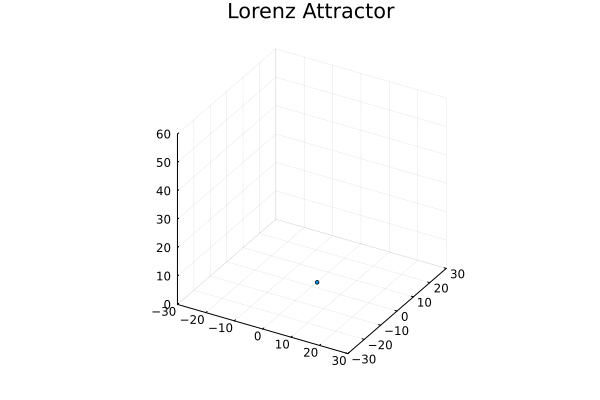

In [3]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

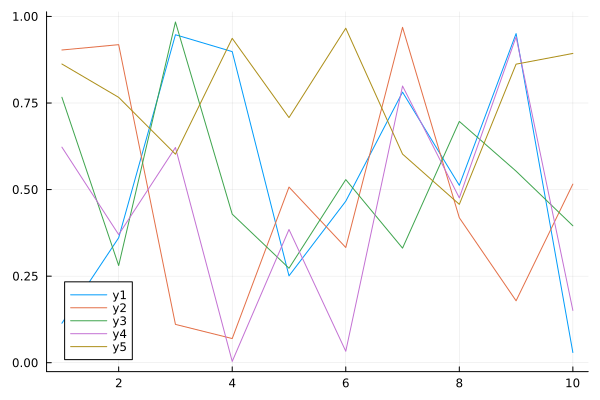

In [4]:
plot(rand(10,5)) 

In [5]:
using JuMP
using HiGHS
model = Model(HiGHS.Optimizer)
@variable(model, x >= 0)
@variable(model, 0 <= y <= 3)
@objective(model, Min, 12x + 20y)
@constraint(model, c1, 6x + 8y >= 100)
@constraint(model, c2, 7x + 12y >= 120)
print(model)
optimize!(model)
termination_status(model)
primal_status(model)
dual_status(model)
objective_value(model)
value(x)
value(y)
shadow_price(c1)
shadow_price(c2)


Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
LP   has 2 rows; 2 cols; 4 nonzeros
Coefficient ranges:
  Matrix [6e+00, 1e+01]
  Cost   [1e+01, 2e+01]
  Bound  [3e+00, 3e+00]
  RHS    [1e+02, 1e+02]
Presolving model
2 rows, 2 cols, 4 nonzeros  0s
2 rows, 2 cols, 4 nonzeros  0s
Presolve : Reductions: rows 2(-0); columns 2(-0); elements 4(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 2(220) 0s
          2     2.0500000000e+02 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 2
Objective value     :  2.0500000000e+02
P-D objective error :  6.9152577690e-17
HiGHS run time      :          0.00


-1.5000000000000007